In [17]:
import pandas as pd
from prophet import Prophet

In [18]:
df = pd.read_csv("../../Data/BeerWineLiquor.csv")

In [19]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [21]:
## columns should be named as such to use prophet :
df.columns = ['ds','y']

In [22]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [23]:
## make sure ds is pandas datetime
df['ds'] = pd.to_datetime(df['ds'])

In [24]:
## monthly start data is the day
## by default prophet expects daily data but we can configure it to handle data of different frequencies

In [25]:
m = Prophet()

In [26]:
m.fit(df)

16:38:33 - cmdstanpy - INFO - Chain [1] start processing
16:38:33 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
## prophet would iteself detect if there is some weekly or monthly seasonality 
## our data here does not have for sure both of them since data is monthly , so need to specify that

In [28]:
## foreasst into future

In [30]:
## placeholder to hold future predictions
future = m.make_future_dataframe(periods = 24,freq = 'MS')
## 24 periods here would be 24 months
# here we need to spedcify freq

In [31]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [32]:
## starts at the same point as original df but woulds have extra 24 months

In [33]:
len(df)

324

In [34]:
len(future)

348

In [36]:
forecast = m.predict(future)
# tells model to predict future bsed on model trained on

In [38]:
forecast.head()
# yhat : predicted output

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1763.763820,1142.174875,1454.191005,1763.763820,1763.763820,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,-461.318276,0.0,0.0,0.0,1302.445544
1,1992-02-01,1766.914160,1189.269985,1509.462623,1766.914160,1766.914160,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,-426.414880,0.0,0.0,0.0,1340.499281
2,1992-03-01,1769.861253,1415.590453,1749.243323,1769.861253,1769.861253,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,-178.480729,0.0,0.0,0.0,1591.380524
3,1992-04-01,1773.011594,1415.388767,1728.669646,1773.011594,1773.011594,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,-196.071714,0.0,0.0,0.0,1576.939880
4,1992-05-01,1776.060310,1666.243619,1978.965880,1776.060310,1776.060310,44.753299,44.753299,44.753299,44.753299,44.753299,44.753299,0.0,0.0,0.0,1820.813610


In [39]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [48]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail()
forecast['ds'] = pd.to_datetime(forecast['ds'])

(16283.0, 18628.0)

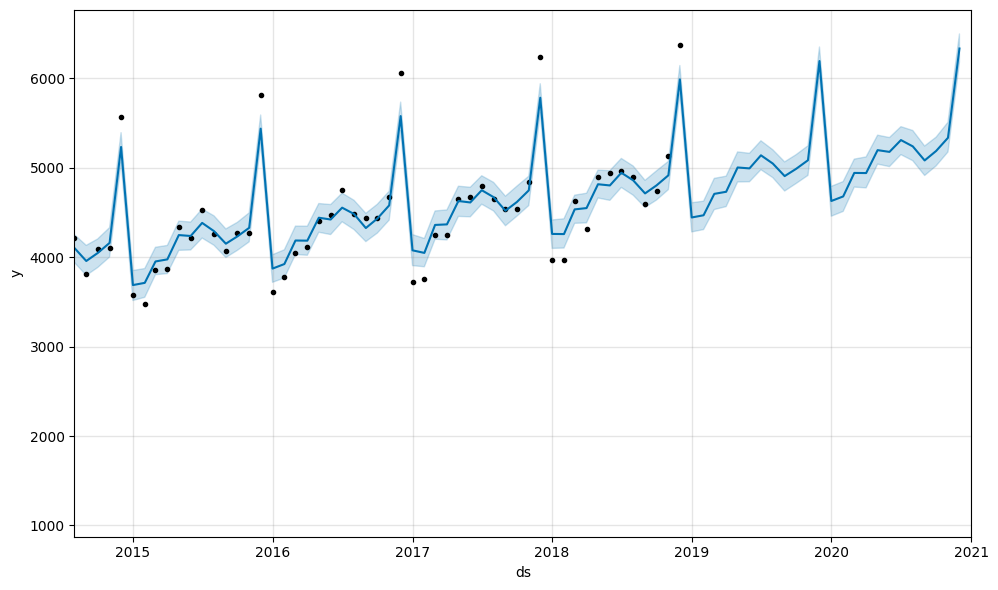

In [52]:
import matplotlib.pyplot as plt
m.plot(forecast);
plt.xlim(pd.to_datetime('2014-08-01'),pd.to_datetime('2021-01-01'))

<Axes: xlabel='ds'>

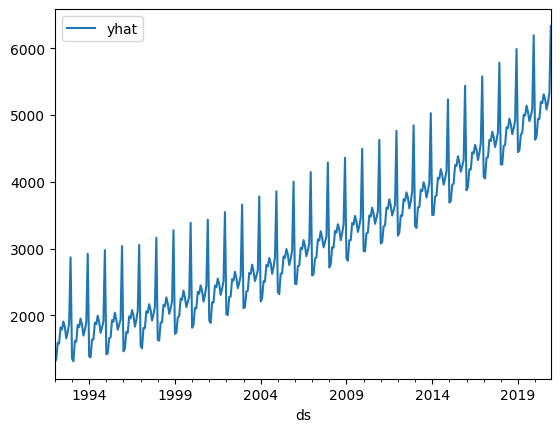

In [53]:
forecast.plot(x = 'ds',y = 'yhat')

c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

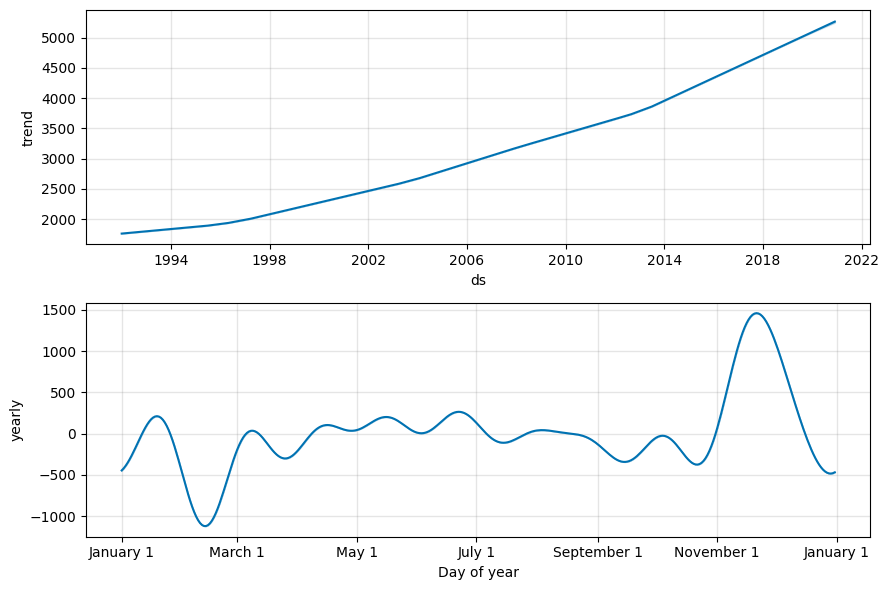

In [56]:
m.plot_components(forecast);